In [1]:
#LOADING DATASET
#Checking the first few lines of the dataset to cross-check the correct loading of the dataset.

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('forestfires.csv')  # Replace with your actual dataset path

# Display the first few rows to understand the structure
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [3]:
#DATA PREPROCESSING

#Encoding the "Month" and "Day" columns using Label Encoding to convert them into numeric values.
    # This is to avoid the type error while checking for null values in each column.
#Checking for missing values and handling missing values
#We will check if there are any missing values (NaN) in the dataset.
#We will be filling the missing values with the median.

In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'month' and 'day' columns
data['month'] = label_encoder.fit_transform(data['month'])
data['day'] = label_encoder.fit_transform(data['day'])

# Check for missing values in the dataset
print(data.isnull().sum())

# If any missing values, handle them (for now, we’ll fill with median)
data = data.fillna(data.median())

# Check again if there are any missing values
print(data.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [5]:
#DATA ANALYSIS AND FEATURE RELEVANCE CHECK &
#DROPPING FEATURES BASED ON THE ANALYSIS

# Here we will be checking the relation between features and the target variable(area)
#Identifying the uninformative features to drop them later
# We will draw plots to understand the relations between variables
#Computing the correlation between features and the target variable

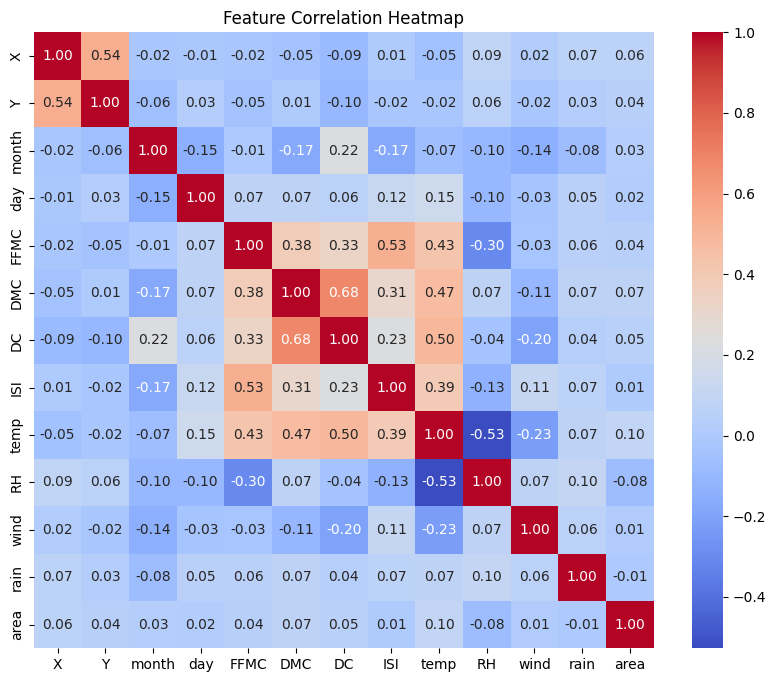


Correlation with target variable (area):
area     1.000000
temp     0.097844
DMC      0.072994
X        0.063385
DC       0.049383
Y        0.044873
FFMC     0.040122
month    0.031054
day      0.018916
wind     0.012317
ISI      0.008258
rain    -0.007366
RH      -0.075519
Name: area, dtype: float64

Features with near-zero variance:
[]
Features after removing low-correlation ones with the target: Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'temp', 'RH', 'area'], dtype='object')


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Feature Analysis
def feature_analysis(data):
    # Correlation matrix
    corr_matrix = data.corr()
    
    # Visualize correlation with heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Heatmap')
    plt.show()

    # Correlation with target variable (area)
    print("\nCorrelation with target variable (area):")
    print(corr_matrix['area'].sort_values(ascending=False))

    # Count near-zero variance features
    near_zero_var_features = data.columns[(data.var() < 0.01)]
    print("\nFeatures with near-zero variance:")
    print(near_zero_var_features.tolist())

# Call the function on your dataset
feature_analysis(data)


# Step 2: Drop Features Based on Correlation with Target Variable
def drop_features_based_on_target_corr(data, threshold=0.04):
    """
    Drops features with low correlation with the target variable (area).
    Features with a correlation below the threshold will be removed.
    """
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Get the correlation of each feature with the target variable 'area'
    target_corr = corr_matrix['area']

    # Identify features with low correlation with the target
    low_corr_features = target_corr[target_corr.abs() < threshold].index

    # Drop these features
    data_reduced = data.drop(columns=low_corr_features)
    return data_reduced

# Apply the function to drop features with low correlation with the target
data_reduced = drop_features_based_on_target_corr(data)
print("Features after removing low-correlation ones with the target:", data_reduced.columns)

In [7]:
#Based on the analysis from above heat map, we can see that the feature: "Rain" has the lowest coorelation (-0.01) on our target
#"Rain". Also, we can see that DMC and DC share high coorelation (0.68), thus either one of them can be dropped to simplify our model.

#we will be dropping DC as it has slightly less correlation with rain as compared to DMC.

In [8]:
#PERFORMING DATA SPLIT

#Now that we have out dataset processed, we will split the data set into the ration of: Training: 80% & Testing: 20%

In [9]:
from sklearn.model_selection import train_test_split

# Define the input features (X) and target variable (y)
X = data.drop(columns=['area'])  # Drop the target variable 'area' from features
y = data['area']  # The target variable

# Perform the 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training Features: {X_train.shape}, Training Target: {y_train.shape}")
print(f"Testing Features: {X_test.shape}, Testing Target: {y_test.shape}")

Training Features: (413, 12), Training Target: (413,)
Testing Features: (104, 12), Testing Target: (104,)


In [10]:
#STANDARDIZATION

#Post Data Split, we still need to normalize the data to be fed into the models.
#We will be using z-szore Normalization for this i.e. for each feature subtracting mean and dividing by standard deviation.
#we will apply scaling only to the training set first and then to test set at later stages to avoide data leakage.

In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Verify the scaled data shapes
print(f"Scaled Training Features: {X_train_scaled.shape}")
print(f"Scaled Testing Features: {X_test_scaled.shape}")

Scaled Training Features: (413, 12)
Scaled Testing Features: (104, 12)


In [12]:
#ML MODELS IMPLEMENTATION: (Linear Regression, KNN and Gaussian SVM)

Linear Regression Performance:
Train MSE: 2006.4786, Test MSE: 11748.9432
Train MAE: 16.3398, Test MAE: 24.5823
Train R²: 0.0352, Test R²: 0.0033


KNN Regression Performance:
Train MSE: 1673.2796, Test MSE: 11784.9942
Train MAE: 14.0755, Test MAE: 26.3610
Train R²: 0.1954, Test R²: 0.0002


Gaussian SVM Performance:
Train MSE: 2173.0179, Test MSE: 12126.7195
Train MAE: 10.7711, Test MAE: 19.6450
Train R²: -0.0449, Test R²: -0.0288


               Model    Train MSE      Test MSE  Train MAE   Test MAE  \
0  Linear Regression  2006.478583  11748.943155  16.339814  24.582297   
1                KNN  1673.279622  11784.994241  14.075482  26.361000   
2       Gaussian SVM  2173.017901  12126.719496  10.771077  19.645001   

   Train R²   Test R²  
0  0.035187  0.003293  
1  0.195405  0.000235  
2 -0.044893 -0.028755  


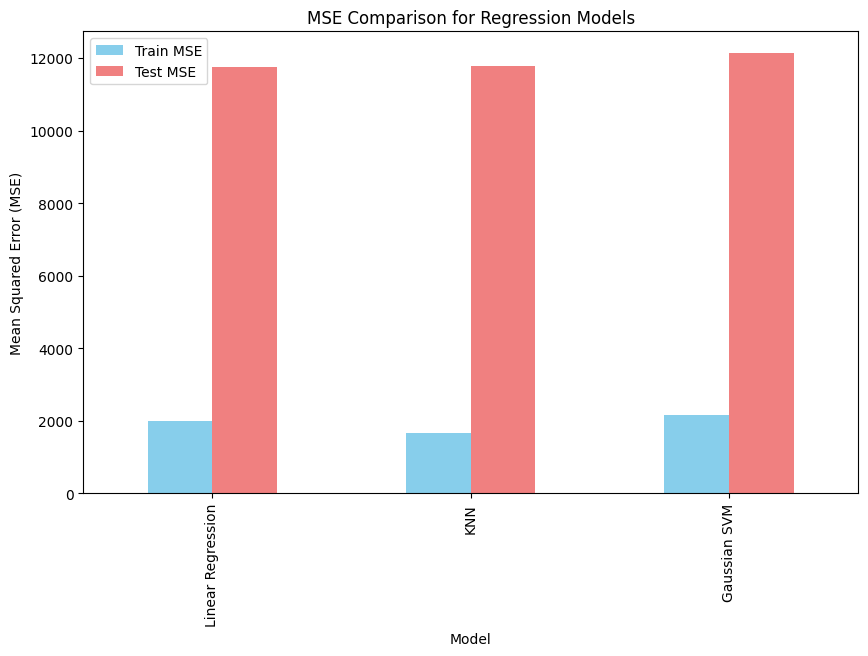

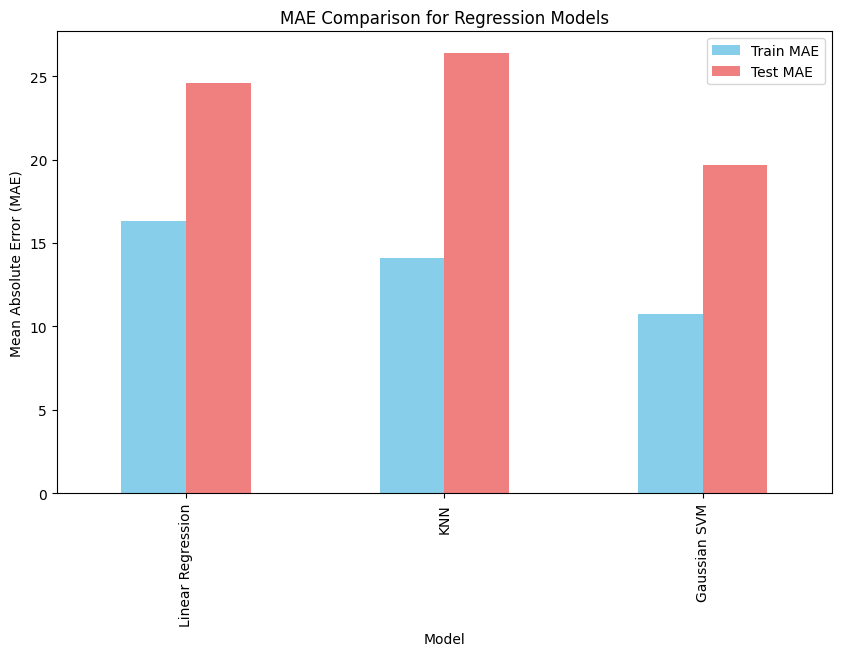

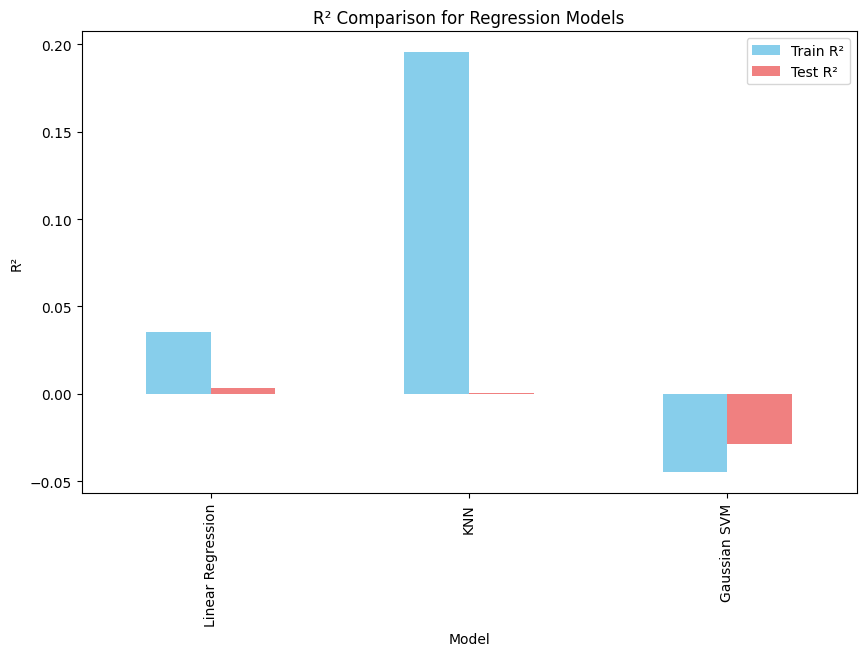

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

# KNN Regression Model with PCA
pca = PCA(n_components=0.95)  # Keeps 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn = KNeighborsRegressor()
knn.fit(X_train_pca, y_train)
y_train_pred_knn = knn.predict(X_train_pca)
y_test_pred_knn = knn.predict(X_test_pca)

# Gaussian SVM Model (SVR)
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_train_pred_svr = svr.predict(X_train_scaled)
y_test_pred_svr = svr.predict(X_test_scaled)

# Calculate errors for Linear Regression
lr_train_mse = mean_squared_error(y_train, y_train_pred_lr)
lr_test_mse = mean_squared_error(y_test, y_test_pred_lr)
lr_train_mae = mean_absolute_error(y_train, y_train_pred_lr)
lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)

# Calculate errors for KNN Regression
knn_train_mse = mean_squared_error(y_train, y_train_pred_knn)
knn_test_mse = mean_squared_error(y_test, y_test_pred_knn)
knn_train_mae = mean_absolute_error(y_train, y_train_pred_knn)
knn_test_mae = mean_absolute_error(y_test, y_test_pred_knn)
knn_train_r2 = r2_score(y_train, y_train_pred_knn)
knn_test_r2 = r2_score(y_test, y_test_pred_knn)

# Calculate errors for Gaussian SVM
svr_train_mse = mean_squared_error(y_train, y_train_pred_svr)
svr_test_mse = mean_squared_error(y_test, y_test_pred_svr)
svr_train_mae = mean_absolute_error(y_train, y_train_pred_svr)
svr_test_mae = mean_absolute_error(y_test, y_test_pred_svr)
svr_train_r2 = r2_score(y_train, y_train_pred_svr)
svr_test_r2 = r2_score(y_test, y_test_pred_svr)

# Print the results for comparison
print("Linear Regression Performance:")
print(f"Train MSE: {lr_train_mse:.4f}, Test MSE: {lr_test_mse:.4f}")
print(f"Train MAE: {lr_train_mae:.4f}, Test MAE: {lr_test_mae:.4f}")
print(f"Train R²: {lr_train_r2:.4f}, Test R²: {lr_test_r2:.4f}")
print("\n")

print("KNN Regression Performance:")
print(f"Train MSE: {knn_train_mse:.4f}, Test MSE: {knn_test_mse:.4f}")
print(f"Train MAE: {knn_train_mae:.4f}, Test MAE: {knn_test_mae:.4f}")
print(f"Train R²: {knn_train_r2:.4f}, Test R²: {knn_test_r2:.4f}")
print("\n")

print("Gaussian SVM Performance:")
print(f"Train MSE: {svr_train_mse:.4f}, Test MSE: {svr_test_mse:.4f}")
print(f"Train MAE: {svr_train_mae:.4f}, Test MAE: {svr_test_mae:.4f}")
print(f"Train R²: {svr_train_r2:.4f}, Test R²: {svr_test_r2:.4f}")
print("\n")

# Compare all models' results in a table
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Gaussian SVM'],
    'Train MSE': [lr_train_mse, knn_train_mse, svr_train_mse],
    'Test MSE': [lr_test_mse, knn_test_mse, svr_test_mse],
    'Train MAE': [lr_train_mae, knn_train_mae, svr_train_mae],
    'Test MAE': [lr_test_mae, knn_test_mae, svr_test_mae],
    'Train R²': [lr_train_r2, knn_train_r2, svr_train_r2],
    'Test R²': [lr_test_r2, knn_test_r2, svr_test_r2],
})

print(comparison_df)

# Plot MSE Comparison (separately)
comparison_df.set_index('Model')[['Train MSE', 'Test MSE']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('MSE Comparison for Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.show()

# Plot MAE Comparison (separately)
comparison_df.set_index('Model')[['Train MAE', 'Test MAE']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('MAE Comparison for Regression Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.show()

# Plot R² Comparison (separately)
comparison_df.set_index('Model')[['Train R²', 'Test R²']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('R² Comparison for Regression Models')
plt.ylabel('R²')
plt.xlabel('Model')
plt.show()

In [ ]:
#RESULT:

# Based on the above results, Linear Regression is the most consistent across training and testing data 
#with relatively better error metrics (MSE and MAE).

In [15]:
# Get the coefficients of the model
coefficients = lr.coef_

# Create a DataFrame to show features and their corresponding coefficients
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficient to identify most important features
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the most relevant features
print(feature_importance_df)

   Feature  Coefficient  Abs_Coefficient
5      DMC     7.696018         7.696018
0        X     4.979418         4.979418
6       DC    -3.207389         3.207389
9       RH    -2.960309         2.960309
8     temp     2.462917         2.462917
10    wind     1.570247         1.570247
3      day     1.290049         1.290049
7      ISI    -1.094432         1.094432
11    rain    -0.884313         0.884313
2    month     0.860967         0.860967
4     FFMC    -0.637576         0.637576
1        Y    -0.029100         0.029100
